# Assignment 1 : Who will survived ?

**My goals for this notebook:**

* **[Part 1: Exploratory Data Analysis]**  
understand the data by EDA and derive simple models with Pandas as baseline


* **[Part 2: Data wrangling]**  
fill nan, convert categorical to numerical,  
create train and test data for ML algorithms

* **[Part 3: Scikit-learn basic ML algorithms](**  
implement different Classifiers from the sklearn library:  
[Logistic regression], [Gaussian naive Bayes], [KNN], [Decision tree], [Random forest], [SVM]


* **[Part 3: Comparison of Model  results]**  
use metrics like confusion_matrix, classification_report, accuracy_score  
and implement k fold cross validation for comparison of test score

**Imports**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv("../data set/titanic/train.csv")
df_test = pd.read_csv("../data set/titanic/test.csv")

## Part 1: Exploratory Data Analysis

survival  = Survival (0 = No, 1 = Yes)

pclass    = Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)

sex       = Sex	

Age       = Age in years	

sibsp	  = # of siblings / spouses aboard the Titanic	

parch	  = # of parents / children aboard the Titanic	

ticket	  = Ticket number	

fare	  = Passenger fare	

cabin	  = Cabin number	

embarked  = Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [5]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**df_train has 891 entries, some values for Cabin and Age are missing**

In [6]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
df_test.count()

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64

In [8]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**Of all passengers in df_train, how many survived, how many died ?** 

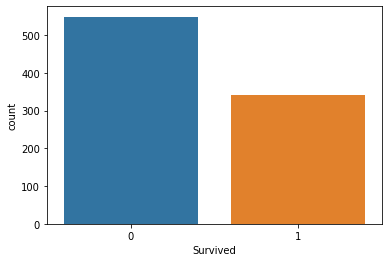

In [9]:
sns.countplot(x='Survived', data=df_train);

In [10]:
print('people survived : %.2f %%'%(df_train.Survived.sum()/df_train.Survived.count()*100))

print('people died : %.2f %%'%( 100- (df_train.Survived.sum()/df_train.Survived.count()*100)))


people survived : 38.38 %
people died : 61.62 %


**Sex: Female more likely to survive than male**

In [11]:
df_train.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

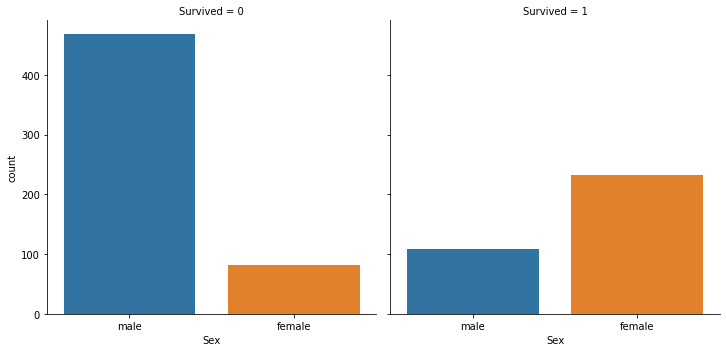

In [12]:
sns.catplot(x='Sex', col='Survived', kind='count', data=df_train);

In [13]:
print("% of women survived: " ,df_train[df_train.Sex == 'female'].Survived.sum()/df_train[df_train.Sex == 'female'].Survived.count())
print("% of men survived:   " , df_train[df_train.Sex == 'male'].Survived.sum()/df_train[df_train.Sex == 'male'].Survived.count())

% of women survived:  0.7420382165605095
% of men survived:    0.18890814558058924


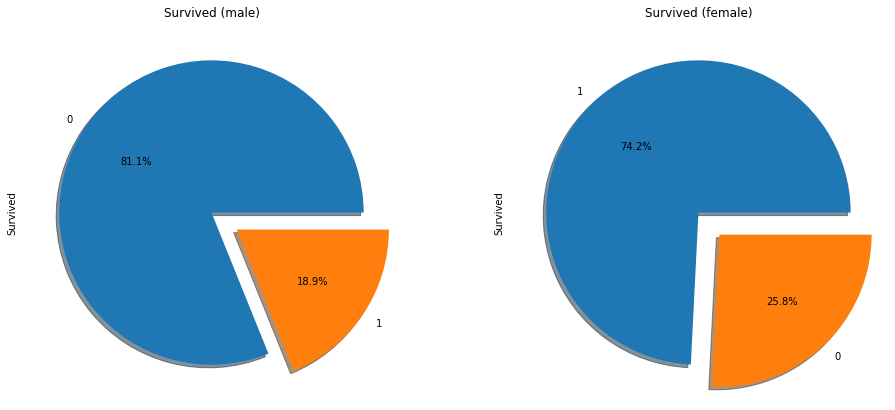

In [14]:
f,ax=plt.subplots(1,2,figsize=(16,7))
df_train['Survived'][df_train['Sex']=='male'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
df_train['Survived'][df_train['Sex']=='female'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('Survived (male)')
ax[1].set_title('Survived (female)')

plt.show()

Women were more likely to survive than men

74 % of women survived but only 19% of men (in training set)

-> second model : all women survived and all men died

submission : 0.766 accuracy

**Passenger Class : Survival rate decreases with Pclass**

In [15]:
pd.crosstab(df_train.Pclass, df_train.Survived, margins=True).style.background_gradient(cmap='autumn_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [16]:
print("% of survivals in") 
print("Pclass=1 : ", df_train.Survived[df_train.Pclass == 1].sum()/df_train[df_train.Pclass == 1].Survived.count())
print("Pclass=2 : ", df_train.Survived[df_train.Pclass == 2].sum()/df_train[df_train.Pclass == 2].Survived.count())
print("Pclass=3 : ", df_train.Survived[df_train.Pclass == 3].sum()/df_train[df_train.Pclass == 3].Survived.count())

% of survivals in
Pclass=1 :  0.6296296296296297
Pclass=2 :  0.47282608695652173
Pclass=3 :  0.24236252545824846


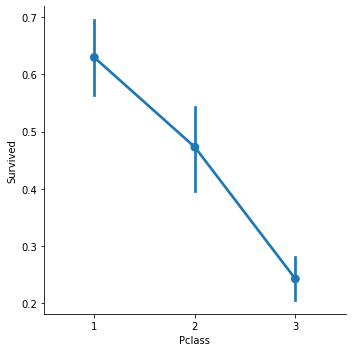

In [17]:
sns.catplot('Pclass','Survived', kind='point', data=df_train);

**Passenger Class and Sex :**

**Almost all women in Pclass 1 and 2 survived and nearly all men in Pclass 2 and 3 died**

In [18]:
pd.crosstab([df_train.Sex, df_train.Survived], df_train.Pclass, margins=True).style.background_gradient(cmap='autumn_r')

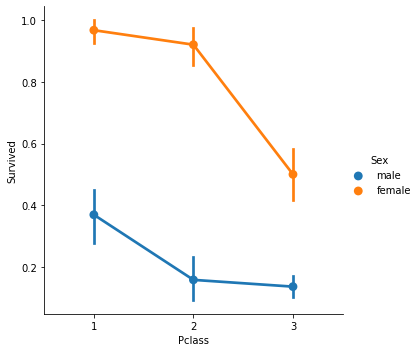

In [19]:
sns.catplot('Pclass','Survived',hue='Sex', kind='point', data=df_train);

**Embarked : Survival rate lowest for S and highest for C**

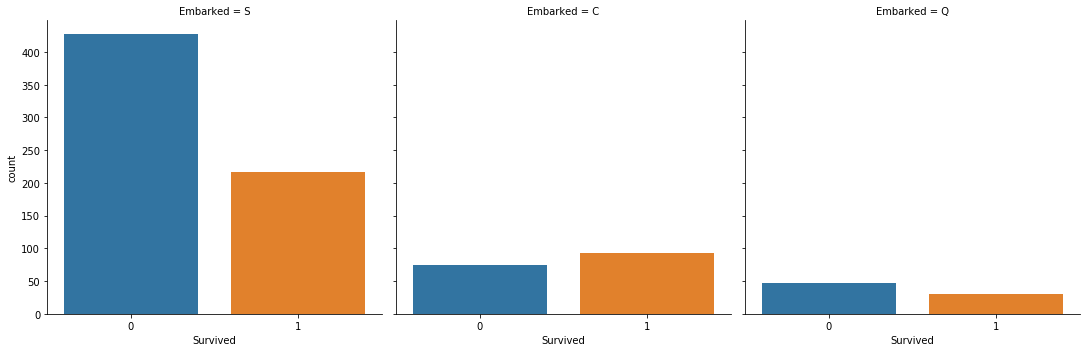

In [20]:
sns.catplot(x='Survived', col='Embarked', kind='count', data=df_train);

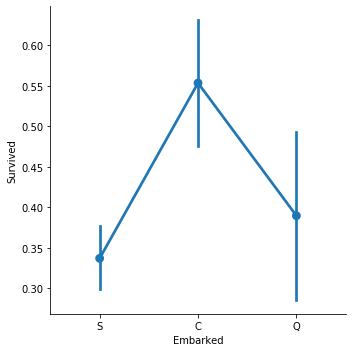

In [21]:
sns.catplot('Embarked','Survived', kind='point', data=df_train);

**Embarked and Sex**

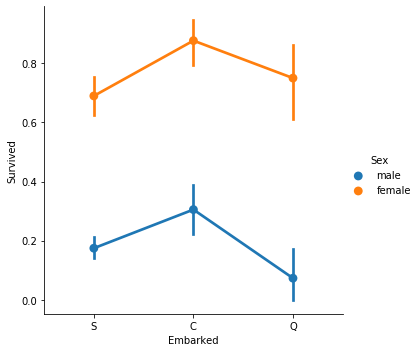

In [22]:
sns.catplot('Embarked','Survived', hue= 'Sex', kind='point', data=df_train);

**Embarked, Pclass and Sex :**

**Practically all women of Pclass 2 that embarked in C and Q survived, also nearly all women of Pclass 1 survived.**

**All men of Pclass 1 and 2 embarked in Q died, survival rate for men in Pclass 2 and 3 is always below 0.2**

**For the remaining men in Pclass 1 that embarked in S and Q, survival rate is approx. 0.4**

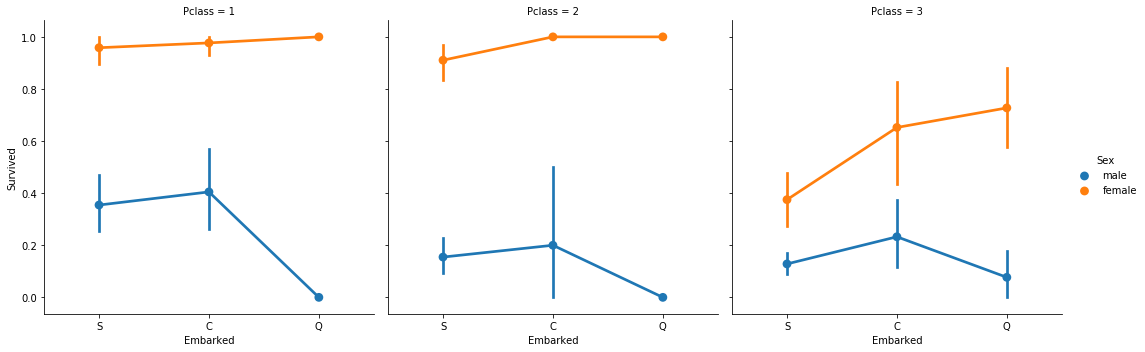

In [23]:
sns.catplot('Embarked','Survived', col='Pclass', hue= 'Sex', kind='point', data=df_train);

In [37]:
pd.crosstab([df_train.Survived], [df_train.Sex, df_train.Pclass, df_train.Embarked], margins=True).style.background_gradient(cmap='autumn_r')


In [33]:
# model 3
df_test['Survived'] = 0

# all women survived
df_test.loc[ (df_test.Sex == 'female'), 'Survived'] = 1

# except for those in Pclass 3 and embarked in S
df_test.loc[ (df_test.Sex == 'female') & (df_test.Pclass == 3) & (df_test.Embarked == 'S') , 'Survived'] = 0

#df_test[['PassengerId', 'Survived']].to_csv('embarked_pclass_sex.csv', index=False)

third model : based on PClass, Sex and Embarked , submission : 0.779 accuracy

**Age: continuous numerical to 8 bins**

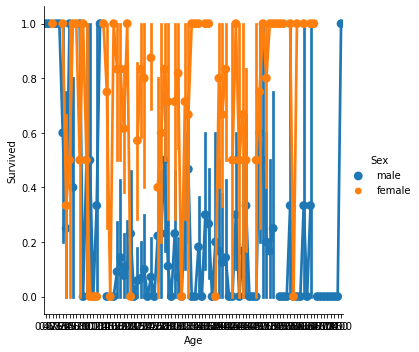

In [24]:
sns.catplot('Age','Survived',hue='Sex',kind='point',data=df_train);

In [25]:
for df in [df_train, df_test]:
    df['Age_bin']=np.nan
    for i in range(8,0,-1):
        df.loc[ df['Age'] <= i*10, 'Age_bin'] = i

In [26]:
print(df_train[['Age' , 'Age_bin']].head(10))

    Age  Age_bin
0  22.0      3.0
1  38.0      4.0
2  26.0      3.0
3  35.0      4.0
4  35.0      4.0
5   NaN      NaN
6  54.0      6.0
7   2.0      1.0
8  27.0      3.0
9  14.0      2.0


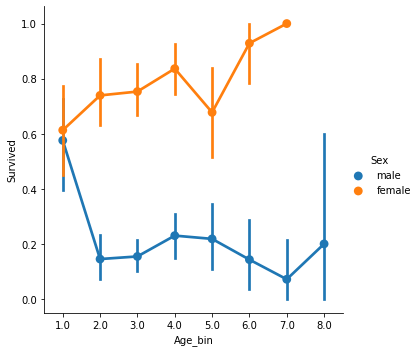

In [27]:
sns.catplot('Age_bin','Survived',hue='Sex',kind='point',data=df_train);

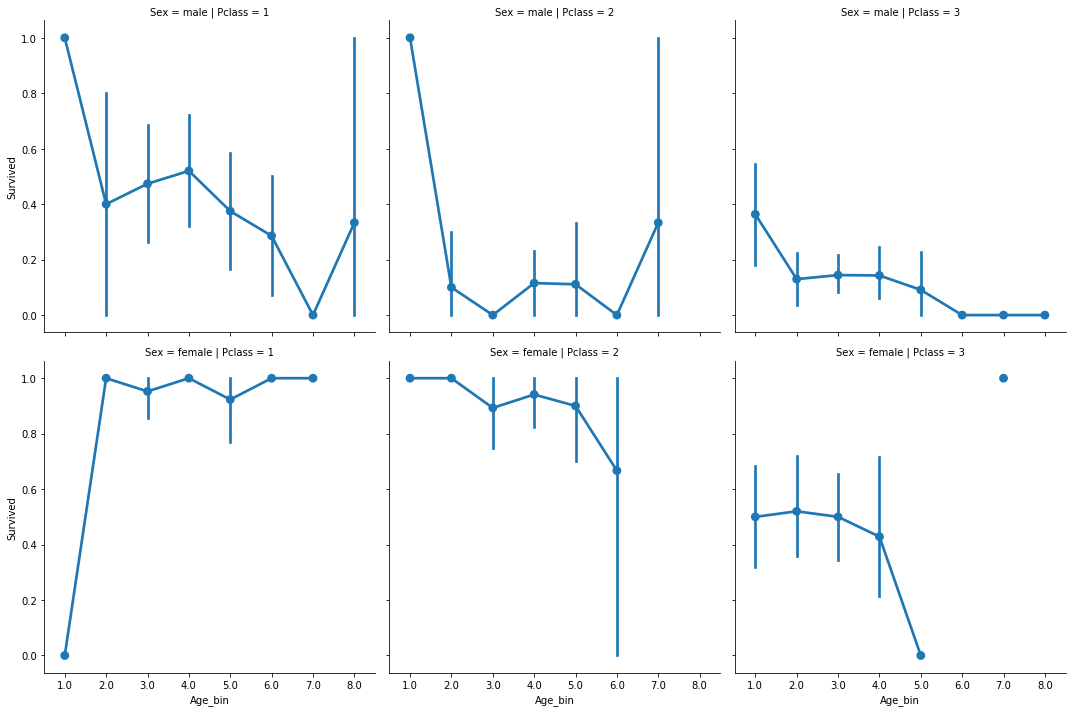

In [28]:
sns.catplot('Age_bin','Survived', col='Pclass' , row = 'Sex', kind='point', data=df_train);


In [29]:
pd.crosstab([df_train.Sex, df_train.Survived], [df_train.Age_bin, df_train.Pclass], margins=True).style.background_gradient(cmap='autumn_r')


For passengers in Age_bin = 1 (younger than 10) : All male in Pclass 1 and 2 survived

All female in Pclass 3 and Age_bin = 5 died.

(Survival rate for female in Pclass 3 and Age_bin = 4 is below 50%)

(Survival rate for male in Pclass 1 and Age_bin = 4 is above 50%)

In [34]:
df_test.loc[ (df_test.Sex == 'male') & (df_test.Pclass == 1) & (df_test.Age_bin == 1), 'Survived']


196    0
Name: Survived, dtype: int64

In [35]:
df_test.loc[ (df_test.Sex == 'male') & (df_test.Pclass == 2) & (df_test.Age_bin == 1), 'Survived']


89     0
194    0
Name: Survived, dtype: int64

In [38]:
# in Pclass 1 and 2 all men in Age_bin = 1 survived
df_test.loc[ (df_test.Sex == 'male') & (df_test.Pclass == 1) & (df_test.Age_bin == 1), 'Survived'] = 1
df_test.loc[ (df_test.Sex == 'male') & (df_test.Pclass == 2) & (df_test.Age_bin == 1), 'Survived'] = 1


**SibSp and Parch**

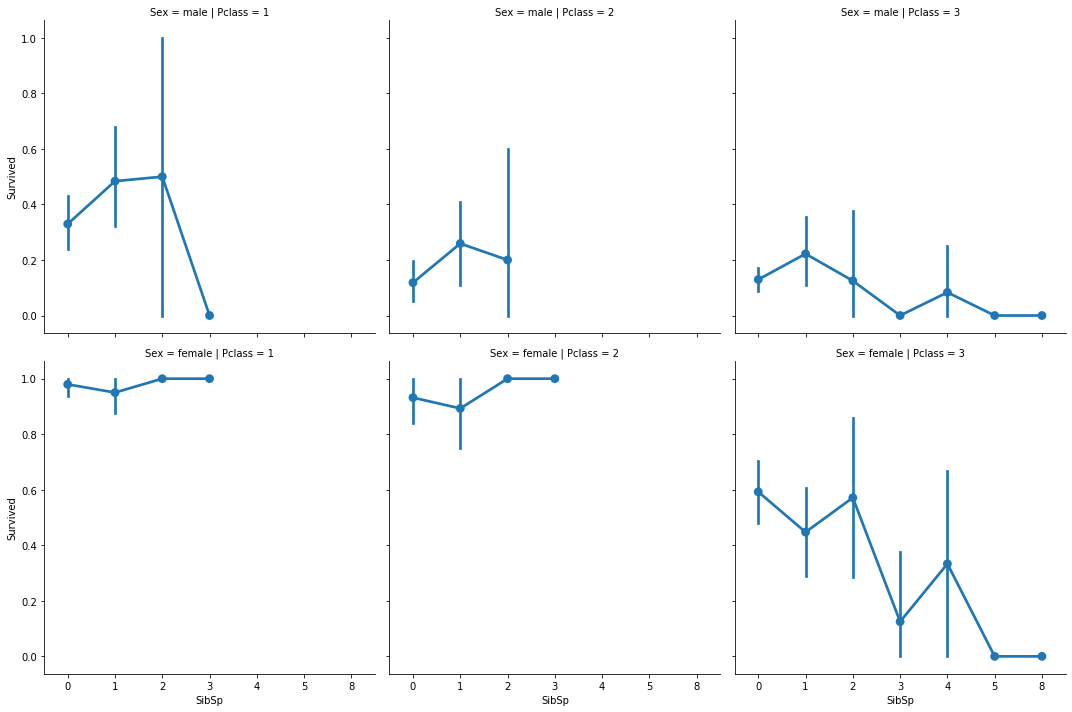

In [39]:
sns.catplot('SibSp','Survived', col='Pclass' , row = 'Sex', kind='point', data=df_train);


In [40]:
pd.crosstab([df_train.Sex, df_train.Survived], [df_train.SibSp, df_train.Pclass], margins=True).style.background_gradient(cmap='autumn_r')


For males, no survival rate above 0.5 
for any values of SibSp. For females, 
passengers with SibSp = 3 and Pclass = 3 died, 
also all females with SibSp > 4 died. 
For females with SibSp = 1 and Pclass = 3 survival rate is below 0.5

In [41]:
df_test.loc[ (df_test.Sex == 'female') & (df_test.SibSp > 7) , 'Survived'] 


188    0
Name: Survived, dtype: int64

In [42]:
# all females with SibSp > 7 died
df_test.loc[ (df_test.Sex == 'female') & (df_test.SibSp > 7) , 'Survived'] = 0


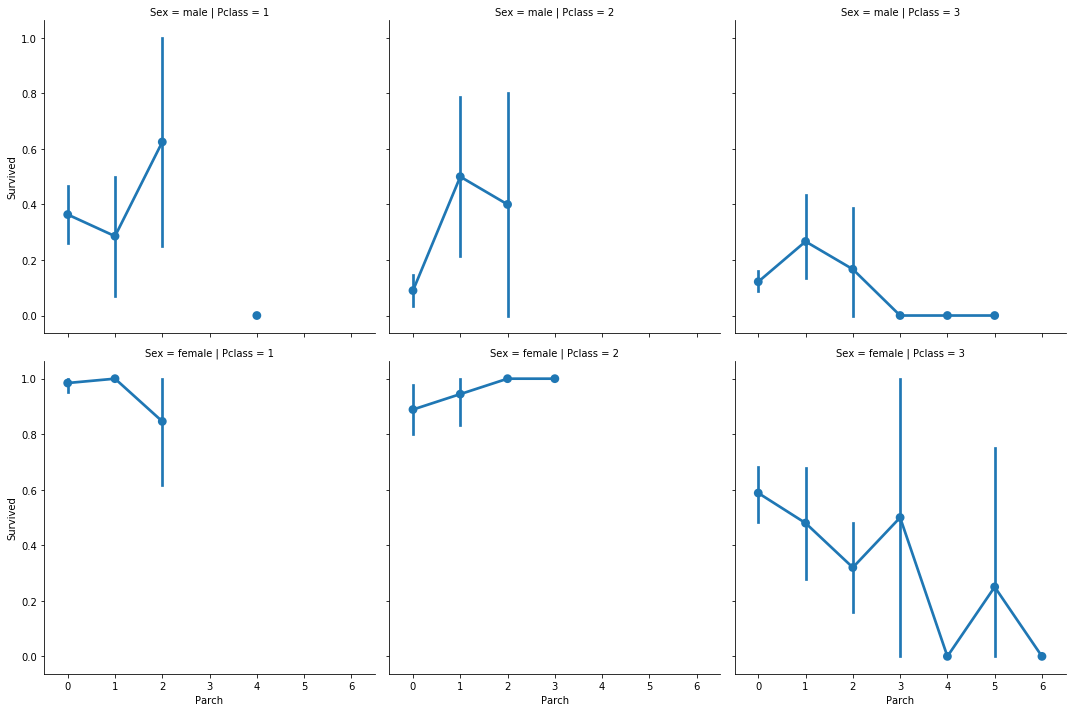

In [43]:
sns.catplot('Parch','Survived', col='Pclass' , row = 'Sex', kind='point', data=df_train);


In [44]:
pd.crosstab([df_train.Sex, df_train.Survived], [df_train.Parch, df_train.Pclass], margins=True).style.background_gradient(cmap='autumn_r')

Very similar to SibSp - 1 , but different values ? For females with Parch = 2 and Pclass = 3 survival rate is below 0.5
All females with Parch = 4 and Pclass = 3 died. All females with Parch > 4 died. (For females with Parch = 1 and Pclass = 3 survival rate is below 0.5) For males,all survival rates below 0.5 for any values of Parch, except for Parch = 2 and Pclass = 1.

In [ ]:
# survival rate is below 0.5 for females with Parch = 2 and Pclass = 3 
#df_test.loc[ (df_test.Sex == 'female') & (df_test.Pclass == 3) & (df_test.Parch == 2), 'Survived'] = 0

# All females with Parch = 4 and Pclass = 3 died
##df_test.loc[ (df_test.Sex == 'female') & (df_test.Pclass == 3) & (df_test.Parch == 4), 'Survived'] = 0

# all females with Parch > 4 died
#df_test.loc[ (df_test.Sex == 'female') & (df_test.Parch > 4) , 'Survived'] = 0

# For males with Parch = 2 and Pclass = 1 survival rate is above 0.5
##df_test.loc[ (df_test.Sex == 'male') & (df_test.Pclass == 1) & (df_test.Parch == 1) , 'Survived'] = 1

#df_test.head(20)

**Fare: continuous numerical to 12 bins**

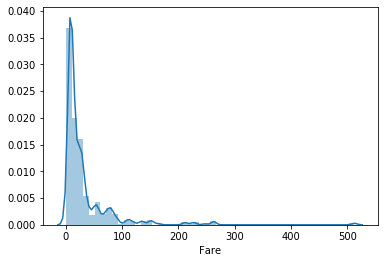

In [45]:
sns.distplot(df_train['Fare']);

In [46]:
for df in [df_train, df_test]:
    df['Fare_bin']=np.nan
    for i in range(12,0,-1):
        df.loc[ df['Fare'] <= i*50, 'Fare_bin'] = i

In [47]:
print(df_train[['Fare' , 'Fare_bin']].head(10))

      Fare  Fare_bin
0   7.2500       1.0
1  71.2833       2.0
2   7.9250       1.0
3  53.1000       2.0
4   8.0500       1.0
5   8.4583       1.0
6  51.8625       2.0
7  21.0750       1.0
8  11.1333       1.0
9  30.0708       1.0


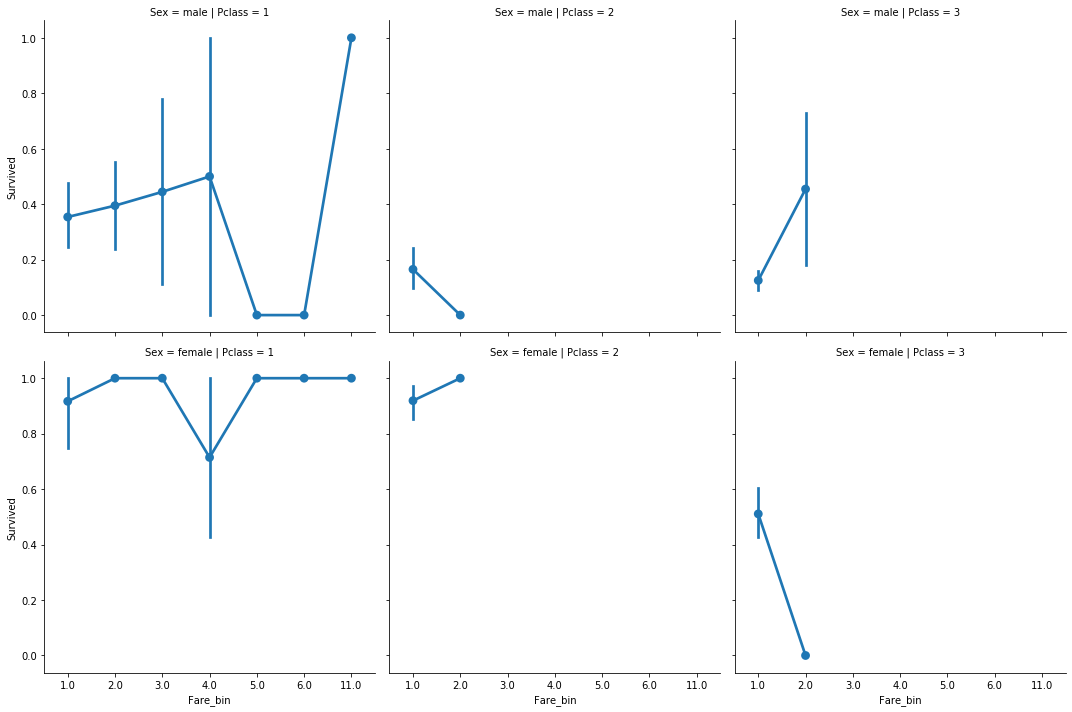

In [48]:
sns.catplot('Fare_bin','Survived', col='Pclass' , row = 'Sex', kind='point', data=df_train);

In [49]:
pd.crosstab([df_train.Sex, df_train.Survived], [df_train.Fare_bin, df_train.Pclass], margins=True).style.background_gradient(cmap='autumn_r')


In [50]:
# males in Fare_bin = 11 survived
df_test.loc[ (df_test.Sex == 'male') & (df_test.Fare_bin == 11), 'Survived'] = 1

## Part 2: Data wrangling

building two new dataframes df_train_ml and df_test_ml  
these will have only ordinal features and no missing values so they can be used for ML algorithms  
converting categorical to numerical by pd.get_dummies  
dropping all features that seem to be not useful for prediction  
Then use the Standard scaler and apply train/test split

In [51]:
df_train_ml = df_train.copy()

df_test.drop(['Survived'],axis=1,inplace=True)

df_test_ml = df_test.copy()

**pandas get_dummies for categorical features**

In [52]:
df_train_ml = pd.get_dummies(df_train_ml, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)
df_train_ml.drop(['PassengerId','Name','Ticket', 'Cabin', 'Age_bin', 'Fare_bin'],axis=1,inplace=True)
df_train_ml.dropna(inplace=True)

In [53]:
df_train_ml.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [54]:
passenger_id = df_test_ml['PassengerId']
df_test_ml = pd.get_dummies(df_test_ml, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)
df_test_ml.drop(['PassengerId','Name','Ticket', 'Cabin', 'Age_bin', 'Fare_bin'],axis=1,inplace=True)

In [55]:
df_test_ml.head()

,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,34.5,0,0,7.8292,1,1,0,0,1
1,47.0,1,0,7.0000,0,0,1,0,1
2,62.0,0,0,9.6875,1,1,0,1,0
3,27.0,0,0,8.6625,1,0,1,0,1
4,22.0,1,1,12.2875,0,0,1,0,1


**Correlation Matrix**

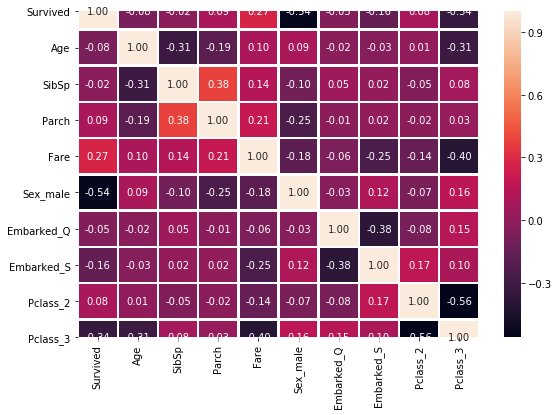

In [56]:
corr = df_train_ml.corr()

f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)
plt.show()

Survived and Fare positively correlated, Survived and Sex_male negatively correlated.
Also, Survived and Pclass_3 negatively correlated. SibSp and Parch correlated

**sklearn StandardScaler**

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# for df_train_ml
scaler.fit(df_train_ml.drop('Survived',axis=1))

scaled_features = scaler.transform(df_train_ml.drop('Survived',axis=1))

df_train_ml_sc = pd.DataFrame(scaled_features, columns=df_train_ml.columns[:-1])

In [58]:
df_train_ml.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [59]:
df_train_ml_sc.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2
0,-0.530377,0.524570,-0.505895,-0.518978,0.759051,-0.202031,0.537409,-0.565489,1.005618
1,0.571831,0.524570,-0.505895,0.691897,-1.317434,-0.202031,-1.860779,-0.565489,-0.994413
2,-0.254825,-0.551703,-0.505895,-0.506214,-1.317434,-0.202031,0.537409,-0.565489,1.005618
3,0.365167,0.524570,-0.505895,0.348049,-1.317434,-0.202031,0.537409,-0.565489,-0.994413
4,0.365167,-0.551703,-0.505895,-0.503850,0.759051,-0.202031,0.537409,-0.565489,1.005618


In [60]:
# for df_test_ml
df_test_ml.fillna(df_test_ml.mean(), inplace=True)
# scaler.fit(df_test_ml)
scaled_features = scaler.transform(df_test_ml)

df_test_ml_sc = pd.DataFrame(scaled_features, columns=df_test_ml.columns)



In [61]:
df_test_ml.head()

,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,34.5,0,0,7.8292,1,1,0,0,1
1,47.0,1,0,7.0000,0,0,1,0,1
2,62.0,0,0,9.6875,1,1,0,1,0
3,27.0,0,0,8.6625,1,0,1,0,1
4,22.0,1,1,12.2875,0,0,1,0,1


In [62]:
df_test_ml_sc.head()

,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0.330723,-0.551703,-0.505895,-0.508025,0.759051,4.949747,-1.860779,-0.565489,1.005618
1,1.191823,0.524570,-0.505895,-0.523705,-1.317434,-0.202031,0.537409,-0.565489,1.005618
2,2.225142,-0.551703,-0.505895,-0.472885,0.759051,4.949747,-1.860779,1.768380,-0.994413
3,-0.185937,-0.551703,-0.505895,-0.492267,0.759051,-0.202031,0.537409,-0.565489,1.005618
4,-0.530377,0.524570,0.666862,-0.423718,-1.317434,-0.202031,0.537409,-0.565489,1.005618


**train_test_split**
use 70% of the data for training and 30% for testing

In [63]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_train_ml.drop('Survived',axis=1), df_train_ml['Survived'], test_size=0.30, random_state=101)

x_train_sc, x_test_sc, y_train_sc, y_test_sc = train_test_split(df_train_ml_sc, df_train_ml['Survived'], test_size=0.30, random_state=101)

**all data for submission**

In [115]:
# unscaled
x_train_all = df_train_ml.drop('Survived',axis=1)

y_train_all = df_train_ml['Survived']

x_test_all = df_test_ml

df_gender  = pd.read_csv("../data set/titanic/gender_submission.csv")

y_test_all = df_gender['Survived']

In [72]:
x_train_all.head()

,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,22.0,1,0,7.2500,1,0,1,0,1
1,38.0,1,0,71.2833,0,0,0,0,0
2,26.0,0,0,7.9250,0,0,1,0,1
3,35.0,1,0,53.1000,0,0,1,0,0
4,35.0,0,0,8.0500,1,0,1,0,1


In [119]:
# scaled
x_train_all_sc = df_train_ml_sc
y_train_all_sc = df_train_ml['Survived']
x_test_all_sc = df_test_ml_sc
y_test_all_sc = y_test_all

In [118]:
x_train_all_sc.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2
0,-0.530377,0.524570,-0.505895,-0.518978,0.759051,-0.202031,0.537409,-0.565489,1.005618
1,0.571831,0.524570,-0.505895,0.691897,-1.317434,-0.202031,-1.860779,-0.565489,-0.994413
2,-0.254825,-0.551703,-0.505895,-0.506214,-1.317434,-0.202031,0.537409,-0.565489,1.005618
3,0.365167,0.524570,-0.505895,0.348049,-1.317434,-0.202031,0.537409,-0.565489,-0.994413
4,0.365167,-0.551703,-0.505895,-0.503850,0.759051,-0.202031,0.537409,-0.565489,1.005618


## Part 3: Scikit-learn basic ML algorithms and comparison of model results

**Test simple sklearn models and compare by metrics**


**We test the following classifiers from scikit-learn:** 

3.1 [Logistic Regression]

3.2 [Gaussian Naive Bayes]

3.3 [K nearest neighbors KNN]

3.4 [Decision tree classifier]

3.5 [Random forest classifier]

3.6 [SVM classifier] 

For comparison of the results we use these metrics:
accuracy_score, classification_report, confusion_matrix

In [68]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

confusion matrix : used to evaluate the quality of the output of a classifier.
The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.
(from sklearn documentation, slightly modified)

The rows of a confusion matrix correspond to the true (actual) classes and the columns correspond to the predicted classes.
So, all together the confusion matrix for a binary classifier consists of 4 values:

TN FP
FN TP

TN: True negatives (prediction: not survived, true: not survived)
FP: False positives (prediction: survived, true: not survived)
FN: False negatives (prediction: not survived, true: survived)
TP: True positives (prediction: survived, true: survived)

accuracy score
classification accuracy = correct predictions / total predictions = (TP + TN) / (TP + TN + FP + FN)

classification_report
from https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html :

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_true.

precision recall f1-score support

### 3.1 Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(x_train,y_train)

pred_logreg = logreg.predict(x_test)

print(confusion_matrix(y_test, pred_logreg))

print(classification_report(y_test, pred_logreg))

print(accuracy_score(y_test, pred_logreg))

[[107  16]
 [ 32  60]]
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       123
           1       0.79      0.65      0.71        92

    accuracy                           0.78       215
   macro avg       0.78      0.76      0.77       215
weighted avg       0.78      0.78      0.77       215

0.7767441860465116


/Users/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**Train again for all data and submit**

In [121]:
logreg.fit(x_train_all, y_train_all)
pred_all_logreg = logreg.predict(x_test_all)
sub_logreg = pd.DataFrame()
sub_logreg['PassengerId'] = df_test['PassengerId']
sub_logreg['Survived'] = pred_all_logreg

print(accuracy_score(y_test, pred_logreg))

#sub_logmodel.to_csv('logmodel.csv',index=False)

0.7767441860465116


/Users/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### 3.2 Gaussian Naive Bayes

In [76]:
from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()

gnb.fit(x_train,y_train)

pred_gnb = gnb.predict(x_test)

print(confusion_matrix(y_test, pred_gnb))

print(classification_report(y_test, pred_gnb))

print(accuracy_score(y_test, pred_gnb))

[[107  16]
 [ 36  56]]
              precision    recall  f1-score   support

           0       0.75      0.87      0.80       123
           1       0.78      0.61      0.68        92

    accuracy                           0.76       215
   macro avg       0.76      0.74      0.74       215
weighted avg       0.76      0.76      0.75       215

0.7581395348837209


**Train again for all data and submit**

In [78]:
gnb.fit(x_train_all, y_train_all)
pred_all_logreg = gnb.predict(x_test_all)
sub_gnb = pd.DataFrame()
sub_gnb['PassengerId'] = df_test['PassengerId']
sub_gnb['Survived'] = pred_all_logreg
#sub_logmodel.to_csv('logmodel.csv',index=False)

### 3.3 KNN - KNeighborsClassifier

In [80]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=20)

knn.fit(x_train_sc,y_train_sc)

pred_knn = knn.predict(x_test)

print(confusion_matrix(y_test, pred_knn))

print(classification_report(y_test, pred_knn))

print(accuracy_score(y_test, pred_knn))

[[71 52]
 [26 66]]
              precision    recall  f1-score   support

           0       0.73      0.58      0.65       123
           1       0.56      0.72      0.63        92

    accuracy                           0.64       215
   macro avg       0.65      0.65      0.64       215
weighted avg       0.66      0.64      0.64       215

0.6372093023255814


**Train again for all data and submit**

In [82]:
knn.fit(x_train_all, y_train_all)
pred_all_knn = knn.predict(x_test_all)
sub_knn = pd.DataFrame()
sub_knn['PassengerId'] = df_test['PassengerId']
sub_knn['Survived'] = pred_all_knn
#sub_knn.to_csv('knn.csv',index=False)

### 3.4 Decision Tree Classifier

In [84]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

dtree.fit(x_train,y_train)

pred_dtree = dtree.predict(x_test)

print(classification_report(y_test,pred_dtree))

print(accuracy_score(y_test, pred_dtree))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       123
           1       0.75      0.64      0.69        92

    accuracy                           0.75       215
   macro avg       0.75      0.74      0.74       215
weighted avg       0.75      0.75      0.75       215

0.7534883720930232


In [86]:
dtree_2 = DecisionTreeClassifier(max_features=7 , max_depth=6,  min_samples_split=8)
dtree_2.fit(x_train,y_train)
pred_dtree_2 = dtree_2.predict(x_test)
print(classification_report(y_test, pred_dtree_2))
print(accuracy_score(y_test, pred_dtree_2))

              precision    recall  f1-score   support

           0       0.76      0.95      0.84       123
           1       0.90      0.60      0.72        92

    accuracy                           0.80       215
   macro avg       0.83      0.77      0.78       215
weighted avg       0.82      0.80      0.79       215

0.8


**Train again for all data and submit**

In [87]:
dtree.fit(x_train_all, y_train_all)
pred_all_dtree = dtree.predict(x_test_all)
sub_dtree = pd.DataFrame()
sub_dtree['PassengerId'] = df_test['PassengerId']
sub_dtree['Survived'] = pred_all_dtree

## 3.5 Random Forest Classifier

In [92]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=500,max_depth=6, max_features=7)

rfc.fit(x_train, y_train)

pred_rfc = rfc.predict(x_test)

print(confusion_matrix(y_test, pred_rfc))

print(classification_report(y_test, pred_rfc))

print(accuracy_score(y_test, pred_rfc))

[[115   8]
 [ 34  58]]
              precision    recall  f1-score   support

           0       0.77      0.93      0.85       123
           1       0.88      0.63      0.73        92

    accuracy                           0.80       215
   macro avg       0.83      0.78      0.79       215
weighted avg       0.82      0.80      0.80       215

0.8046511627906977


**Train again for all data and submit**

In [93]:
rfc.fit(x_train_all, y_train_all)
pred_all_rfc = rfc.predict(x_test_all)
sub_rfc = pd.DataFrame()
sub_rfc['PassengerId'] = df_test['PassengerId']
sub_rfc['Survived'] = pred_all_rfc
#sub_rfc.to_csv('randforest.csv',index=False)

## 3.6 SVM Classifier

In [94]:
from sklearn.svm import SVC

svc = SVC(gamma = 0.01, C = 100)#, probability=True)

svc.fit(x_train_sc, y_train_sc)

pred_svc = svc.predict(x_test_sc)

print(confusion_matrix(y_test_sc, pred_svc))

print(classification_report(y_test_sc, pred_svc))

print(accuracy_score(y_test_sc, pred_svc))

[[116   7]
 [ 34  58]]
              precision    recall  f1-score   support

           0       0.77      0.94      0.85       123
           1       0.89      0.63      0.74        92

    accuracy                           0.81       215
   macro avg       0.83      0.79      0.79       215
weighted avg       0.82      0.81      0.80       215

0.8093023255813954


**Train again for all data and submit**

In [95]:
svc.fit(x_train_all_sc, y_train_all_sc)
pred_all_svc = svc.predict(x_test_all_sc)

sub_svc = pd.DataFrame()
sub_svc['PassengerId'] = df_test['PassengerId']
sub_svc['Survived'] = pred_all_svc
sub_svc.to_csv('svc.csv',index=False)

### k fold cross_validation

This algorithm splits the data into k sets and then makes k fits using every set k-1 times as training and one time as test data
It leads to a better estimate for out of sample data than simple train test split

In [96]:
from sklearn.model_selection import cross_val_score

for Logistic Regression

In [104]:
scores_logreg = cross_val_score(logreg, x_train_all_sc, y_train_all_sc, cv=10, scoring='accuracy')
print(scores_logreg)
print(scores_logreg.mean())

[0.76388889 0.75       0.79166667 0.84722222 0.73239437 0.78873239
 0.78873239 0.78873239 0.81690141 0.83098592]
0.7899256651017215


/Users/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

for Naive Bayes

In [103]:
scores_gnb = cross_val_score(gnb, x_train_all_sc, y_train_all_sc, cv=10, scoring='accuracy')
print(scores_gnb)
print(scores_gnb.mean())

[0.72222222 0.66666667 0.80555556 0.79166667 0.70422535 0.84507042
 0.77464789 0.77464789 0.83098592 0.81690141]
0.7732589984350547


for KNN

In [105]:
scores_knn = cross_val_score(knn, x_train_all_sc, y_train_all_sc, cv=10, scoring='accuracy')
print(scores_knn)
print(scores_knn.mean())

[0.75       0.72222222 0.76388889 0.84722222 0.77464789 0.8028169
 0.8028169  0.74647887 0.84507042 0.76056338]
0.7815727699530517


for DecisionTreeClassifier

In [102]:
scores_dtree_2 = cross_val_score(dtree_2, x_train_all_sc, y_train_all_sc, cv=10, scoring='accuracy')
print(scores_dtree_2)
print(scores_dtree_2.mean())

[0.69444444 0.77777778 0.75       0.88888889 0.8028169  0.78873239
 0.81690141 0.8028169  0.87323944 0.83098592]
0.802660406885759


for Random Forest classifier

In [100]:
scores_rfc = cross_val_score(rfc, x_train_all_sc, y_train_all_sc, cv=10, scoring='accuracy')
print(scores_rfc)
print(scores_rfc.mean())

[0.75       0.76388889 0.73611111 0.90277778 0.85915493 0.85915493
 0.81690141 0.73239437 0.88732394 0.87323944]
0.8180946791862285


for SVM classifier

In [98]:
scores_svc = cross_val_score(svc, x_train_all_sc, y_train_all_sc, cv=10, scoring='accuracy')
print(scores_svc)
print(scores_svc.mean())

[0.81944444 0.80555556 0.76388889 0.875      0.81690141 0.8028169
 0.8028169  0.73239437 0.88732394 0.84507042]
0.8151212832550861


**The Classifiers with best performance**

In [107]:
print("LR    : " , scores_logreg.mean())
print("NB    : " , scores_gnb.mean())
print("KNN   : " , scores_knn.mean())
print("dtree : " , scores_dtree_2.mean())
print("rfc   : " , scores_rfc.mean())
print("svc   : " , scores_svc.mean())

LR    :  0.7899256651017215
NB    :  0.7732589984350547
KNN   :  0.7815727699530517
dtree :  0.802660406885759
rfc   :  0.8180946791862285
svc   :  0.8151212832550861
